<a href="https://colab.research.google.com/github/cokroam/FinalTask---HC/blob/main/Final_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/application_test.csv')

In [3]:
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(40377, 121)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40377 entries, 0 to 40376
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(20), object(16)
memory usage: 37.3+ MB


In [6]:
df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,40377.000000,40377.000000,4.037700e+04,4.037700e+04,40355.000000,4.037700e+04,40377.000000,40377.000000,40377.000000,40377.000000,...,40376.000000,40376.0,40376.0,40376.0,35409.000000,35409.000000,35409.000000,35409.000000,35409.000000,35409.000000
mean,247111.724942,0.396067,1.783662e+05,5.150383e+05,29352.657985,4.610047e+05,0.021208,-16078.013324,68092.189241,-4983.507319,...,0.001610,0.0,0.0,0.0,0.002146,0.001666,0.002683,0.009743,0.548279,1.989748
std,85452.901835,0.706968,1.018328e+05,3.644779e+05,16008.070393,3.360184e+05,0.014360,4326.809884,144817.065751,3560.528661,...,0.040091,0.0,0.0,0.0,0.046280,0.043468,0.053341,0.115168,0.696315,1.844001
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,173277.000000,0.000000,1.125000e+05,2.606400e+05,17905.500000,2.250000e+05,0.010006,-19651.000000,-2889.000000,-7479.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,246615.000000,0.000000,1.575000e+05,4.500000e+05,26091.000000,3.870000e+05,0.018850,-15804.000000,-1280.000000,-4513.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,320191.000000,1.000000,2.250000e+05,6.750000e+05,37309.500000,6.300000e+05,0.028663,-12502.000000,-290.000000,-1911.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,397178.000000,20.000000,4.410000e+06,2.160000e+06,180576.000000,2.160000e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,1.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [7]:
df.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     4968
AMT_REQ_CREDIT_BUREAU_WEEK    4968
AMT_REQ_CREDIT_BUREAU_MON     4968
AMT_REQ_CREDIT_BUREAU_QRT     4968
AMT_REQ_CREDIT_BUREAU_YEAR    4968
Length: 121, dtype: int64

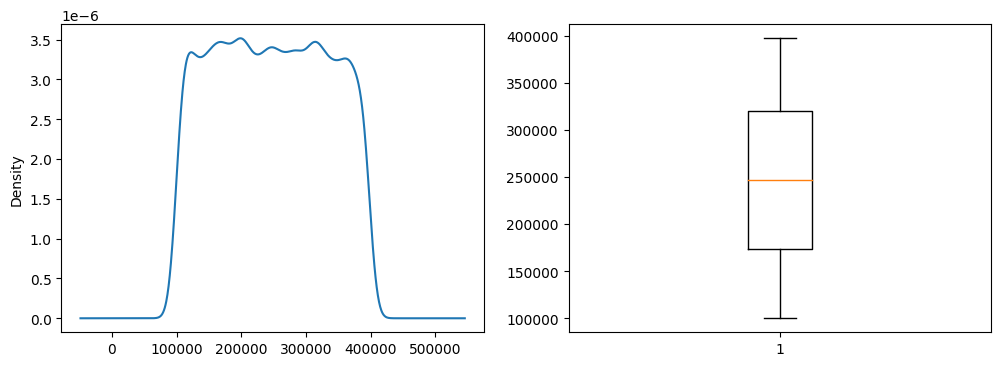

In [8]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['SK_ID_CURR'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['SK_ID_CURR'])
plt.show()

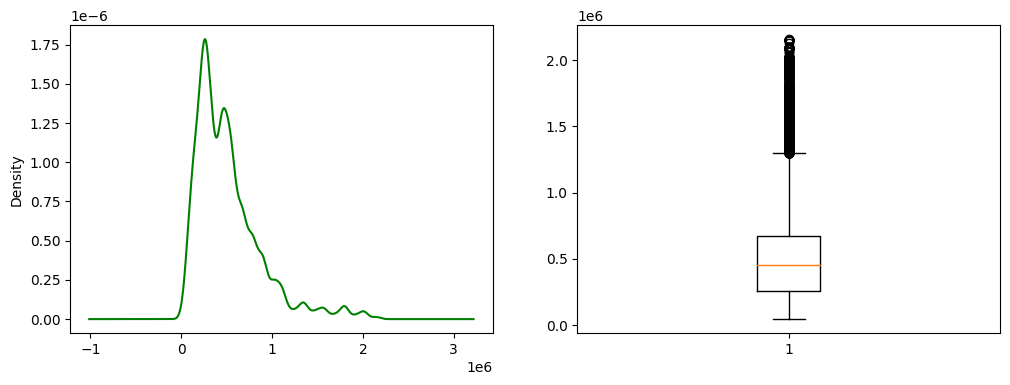

In [10]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['AMT_CREDIT'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(df['AMT_CREDIT'])
plt.show()


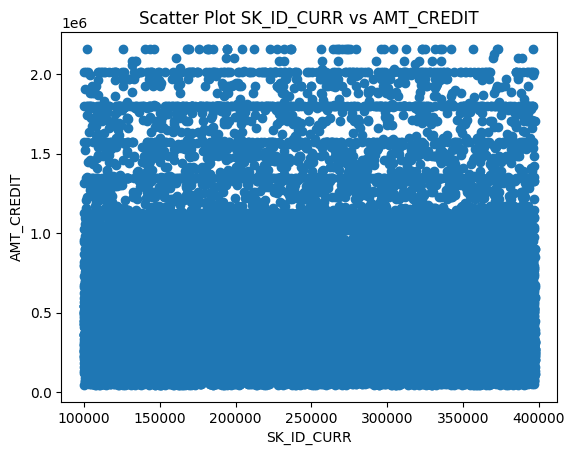

In [11]:
plt.scatter(df['SK_ID_CURR'], df['AMT_CREDIT'])
plt.xlabel('SK_ID_CURR')
plt.ylabel('AMT_CREDIT')
plt.title('Scatter Plot SK_ID_CURR vs AMT_CREDIT')
plt.show()

In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.001686,0.000459,-0.001911,0.000939,-0.002066,0.002477,-0.000453,0.007328,-0.007886,...,-0.006059,NaN,NaN,NaN,0.000674,-0.006323,-0.002481,0.008340,0.000621,0.010789
CNT_CHILDREN,-0.001686,1.000000,0.036668,0.027461,0.057296,0.024819,-0.014708,0.320745,-0.239067,0.180173,...,-0.003273,NaN,NaN,NaN,0.008294,0.001302,0.007500,-0.010349,0.031429,-0.039424
AMT_INCOME_TOTAL,0.000459,0.036668,1.000000,0.398264,0.457783,0.404089,0.199825,0.055312,-0.156342,0.067292,...,-0.009016,NaN,NaN,NaN,0.011682,-0.000189,-0.003776,0.007887,0.005480,0.004703
AMT_CREDIT,-0.001911,0.027461,0.398264,1.000000,0.777666,0.988016,0.132805,-0.046128,-0.084106,0.031477,...,0.000064,NaN,NaN,NaN,0.000929,0.004556,0.001061,-0.003227,-0.010339,-0.033191
AMT_ANNUITY,0.000939,0.057296,0.457783,0.777666,1.000000,0.786760,0.149539,0.048112,-0.139895,0.064264,...,-0.010922,NaN,NaN,NaN,0.012145,0.005359,0.003686,0.004970,0.009221,-0.044237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.006323,0.001302,-0.000189,0.004556,0.005359,0.005380,-0.010412,-0.003910,0.002801,0.000828,...,-0.001484,NaN,NaN,NaN,0.110535,1.000000,0.034614,0.008040,0.004340,0.001270
AMT_REQ_CREDIT_BUREAU_WEEK,-0.002481,0.007500,-0.003776,0.001061,0.003686,0.001966,-0.002639,0.013489,-0.013793,0.010047,...,0.011748,NaN,NaN,NaN,-0.002333,0.034614,1.000000,0.050913,0.023506,0.000280
AMT_REQ_CREDIT_BUREAU_MON,0.008340,-0.010349,0.007887,-0.003227,0.004970,-0.003108,0.001089,0.016680,-0.015232,0.007520,...,-0.003276,NaN,NaN,NaN,0.027869,0.008040,0.050913,1.000000,0.008749,0.024674
AMT_REQ_CREDIT_BUREAU_QRT,0.000621,0.031429,0.005480,-0.010339,0.009221,-0.010691,-0.028568,0.089563,-0.045935,0.048050,...,-0.016848,NaN,NaN,NaN,-0.000586,0.004340,0.023506,0.008749,1.000000,-0.013087


In [13]:
x = df['SK_ID_CURR'].values.reshape(-1,1)
y = df['AMT_CREDIT'].values.reshape(-1,1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
lin_reg = LinearRegression()

In [16]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [17]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[-0.00469268]]
[516066.15903239]


In [18]:
lin_reg.score(x_test, y_test)

6.83205062934622e-06

Text(0.5, 1.0, 'Plot SK_ID_CURR vs AMT_CREDIT')

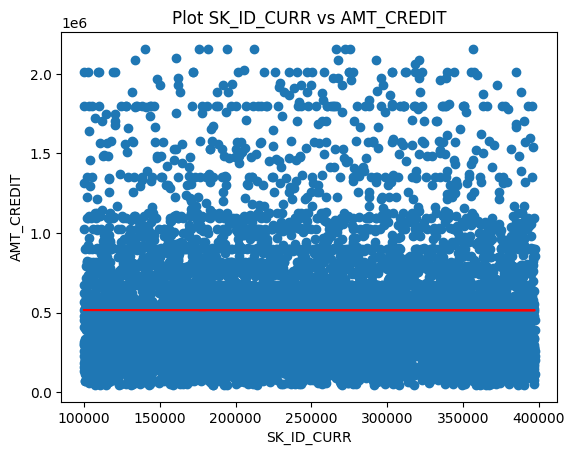

In [19]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('SK_ID_CURR')
plt.ylabel('AMT_CREDIT')
plt.title('Plot SK_ID_CURR vs AMT_CREDIT')